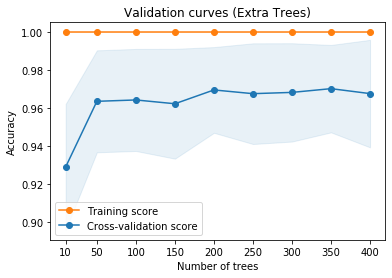

In [11]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import validation_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()
train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]
np.random.seed(123456)
# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 500
ensemble = ExtraTreesClassifier(n_estimators=ensemble_size, n_jobs=4)
param_range = [10, 50, 100, 150, 200, 250, 300, 350, 400]
train_scores, test_scores = validation_curve(ensemble, train_x, train_y, 'n_estimators', param_range,
cv=10, scoring='accuracy')
# --- SECTION 3 ---
# Calculate the average and standard deviation for each hyperparameter
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# --- SECTION 4 ---
# Plot the scores
plt.figure()
plt.title('Validation curves (Extra Trees)')
# Plot the standard deviations
plt.fill_between(param_range, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1,
color="C1")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.1, color="C0")
# Plot the means
plt.plot(param_range, train_scores_mean, 'o-', color="C1",
label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="C0",
label="Cross-validation score")
plt.xticks(param_range)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend(loc="best")